In [1]:
%pip install pandas
%pip install numpy
%pip install scikit-learn
%pip install seaborn
%pip install matplotli



Note: you may need to restart the kernel to use updated packages.

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement matplotli (from versions: none)
ERROR: No matching distribution found for matplotli


In [2]:
### importing required libraries
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
from sklearn import metrics

from sklearn.preprocessing import StandardScaler, normalize

from sklearn.cluster import AgglomerativeClustering

In [3]:
df = pd.read_csv("CC GENERAL.csv")


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [5]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [6]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [7]:
### Removing Categorical column from the data
df.drop(['TENURE'], axis=1, inplace=True)

### Removing unnecessary column from the data
df.drop(['CUST_ID'], axis=1, inplace=True)

In [8]:
### finding null values in data
df.isna().sum()


BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
dtype: int64

In [9]:
### filling null values
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].mean(), inplace=True)
df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].mean(), inplace=True)

In [10]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

In [11]:
scaled_df

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.52897879,
        -0.31096755, -0.52555097],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.81864213,
         0.08931021,  0.2342269 ],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.38380474,
        -0.10166318, -0.52555097],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.5706145 ,
        -0.33546549,  0.32919999],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.58053567,
        -0.34690648,  0.32919999],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.57686873,
        -0.33294642, -0.52555097]])

In [12]:
normalized_df = normalize(scaled_df)

In [13]:
normalized_df

array([[-0.31568963, -0.10757517, -0.18324916, ..., -0.22813599,
        -0.13411292, -0.22665765],
       [ 0.22105112,  0.03773074, -0.13189343, ...,  0.22995014,
         0.02508654,  0.06579249],
       [ 0.12734868,  0.1475556 , -0.03066502, ..., -0.10931153,
        -0.02895472, -0.14968232],
       ...,
       [-0.32313955, -0.08094952, -0.1754338 , ..., -0.24903915,
        -0.14641065,  0.14367613],
       [-0.2964184 , -0.07377968, -0.18678023, ..., -0.23092781,
        -0.13799385,  0.13095049],
       [-0.20629806, -0.32031744,  0.01518508, ..., -0.20784504,
        -0.11996016, -0.18935532]])

In [14]:
pca = PCA(2)
x_pca = pca.fit_transform(normalized_df)
df2 = pd.DataFrame(data=x_pca)
df2

,0,1
0,-0.488186,-0.677233
1,-0.517294,0.556075
2,0.334384,0.287313
3,-0.486617,-0.080780
4,-0.562175,-0.474770
...,...,...
8945,0.567210,-0.483668
8946,0.467902,-0.461968
8947,0.366767,-0.699075
8948,-0.623099,-0.497136


In [15]:
k_clusters=[]
silhoutte_Scores=[]

silhoutte score : 0.40418006944372165 , with 2 clusters


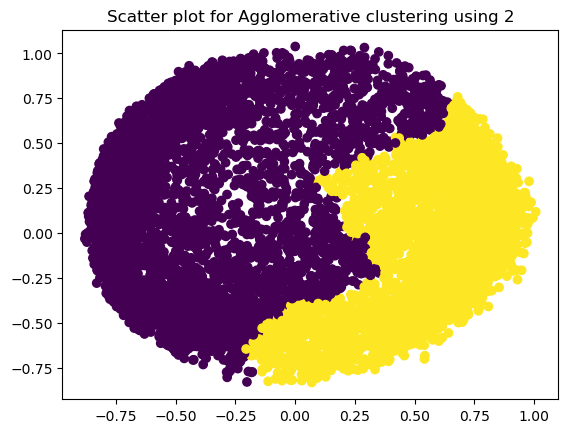

In [16]:
nclusters = 2
ac = AgglomerativeClustering(n_clusters=nclusters)
y_cluster_kmeans = ac.fit_predict(df2)
score = metrics.silhouette_score(df2, y_cluster_kmeans)
print("silhoutte score : {0} , with {1} clusters".format(score,nclusters))
labels = ac.labels_
k_clusters.append(nclusters)
silhoutte_Scores.append(score)
plt.title("Scatter plot for Agglomerative clustering using {}".format(nclusters))
plt.scatter(df2[0], df2[1], c=ac.labels_)
plt.show()

silhoutte score : 0.41420535534485653 , with 3 clusters


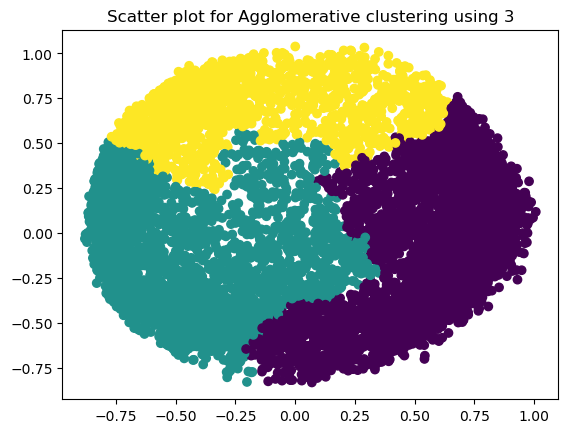

In [17]:
nclusters = 3
ac = AgglomerativeClustering(n_clusters=nclusters)
y_cluster_kmeans = ac.fit_predict(df2)
score = metrics.silhouette_score(df2, y_cluster_kmeans)
print("silhoutte score : {0} , with {1} clusters".format(score,nclusters))
labels = ac.labels_
k_clusters.append(nclusters)
silhoutte_Scores.append(score)
plt.title("Scatter plot for Agglomerative clustering using {}".format(nclusters))
plt.scatter(df2[0], df2[1], c=ac.labels_)
plt.show()

silhoutte score : 0.3698251082097767 , with 4 clusters


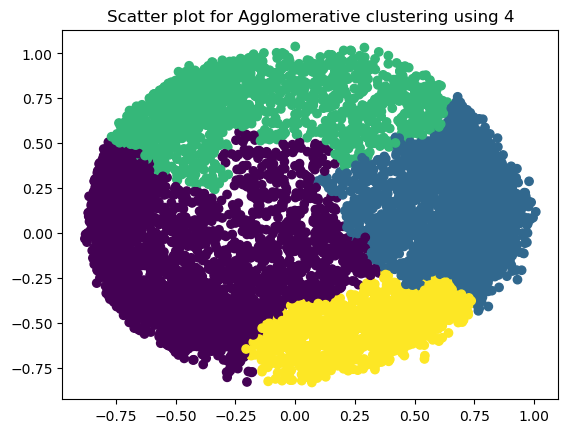

In [18]:
nclusters = 4
ac = AgglomerativeClustering(n_clusters=nclusters)
y_cluster_kmeans = ac.fit_predict(df2)
score = metrics.silhouette_score(df2, y_cluster_kmeans)
print("silhoutte score : {0} , with {1} clusters".format(score,nclusters))
labels = ac.labels_
k_clusters.append(nclusters)
silhoutte_Scores.append(score)
plt.title("Scatter plot for Agglomerative clustering using {}".format(nclusters))
plt.scatter(df2[0], df2[1], c=ac.labels_)
plt.show()

silhoutte score : 0.32839641862562424 , with 5 clusters


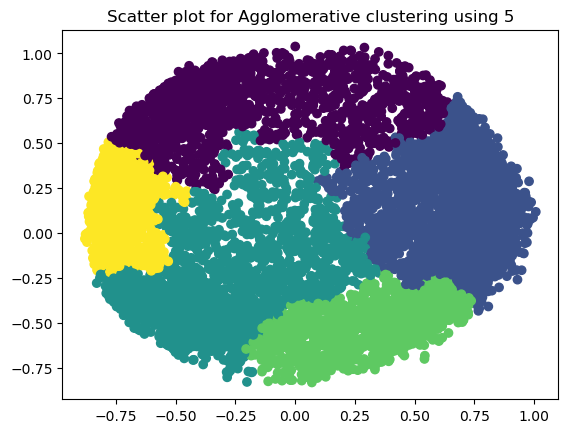

In [19]:
nclusters = 5
ac = AgglomerativeClustering(n_clusters=nclusters)
y_cluster_kmeans = ac.fit_predict(df2)
score = metrics.silhouette_score(df2, y_cluster_kmeans)
print("silhoutte score : {0} , with {1} clusters".format(score,nclusters))
labels = ac.labels_
k_clusters.append(nclusters)
silhoutte_Scores.append(score)
plt.title("Scatter plot for Agglomerative clustering using {}".format(nclusters))
plt.scatter(df2[0], df2[1], c=ac.labels_)
plt.show()

In [20]:
score

0.32839641862562424

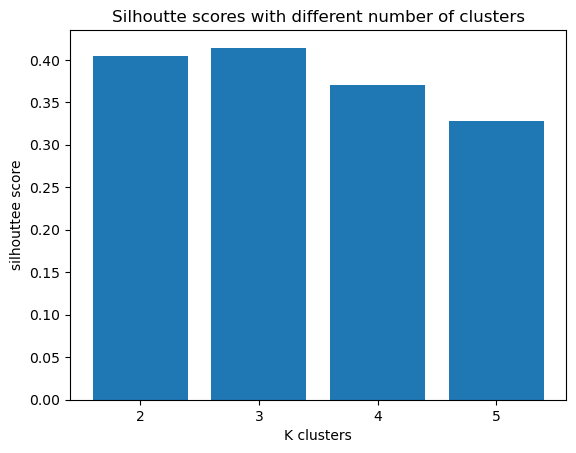

In [21]:
plt.title("Silhoutte scores with different number of clusters")
plt.bar(x=k_clusters,height=silhoutte_Scores)
plt.xlabel('K clusters')
plt.ylabel('silhouttee score')
plt.xticks(k_clusters)
plt.show()